### **Sempre rode essa primeira célula antes de rodar qualquer outra**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA_URL = r"C:\Users\gabri\Documents\PROJETOS\PY\PJ_Code\DE\Data\Modelo 2\dados_completos - Copy.csv"
df = pd.read_csv(DATA_URL)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gabri\\Documents\\PROJETOS\\PY\\PJ_Code\\DE\\Data\\Modelo 2\\dados_completos - Copy.csv'

In [3]:
df = df.dropna(subset=['order_id','delivery_time','TimeToApprove','ApprovedToCarrier','Days_Delivery_CarrierToCustomer','seller_state','distance','product_category_name','product_weight_g','volume'])
df = df[df['distance'] != 0]

In [4]:
df_num = df.select_dtypes(include=['float64', 'int64'])

In [5]:
#ajuste nome da coluna em [''] confome o dado a ser analisado
data = 'delivery_time'

#### Gráfico de coluna (x, y)

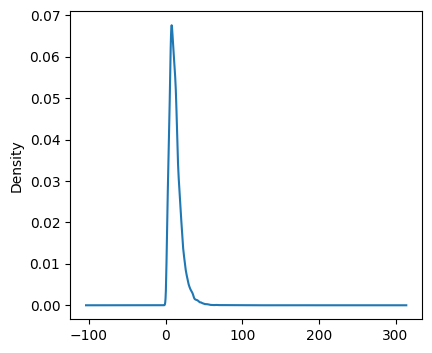

In [6]:
df[data].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

#adiciona limites ao eixo x, ajuste conforme necessidade
plt.xlim(0, 40) 
plt.show()

#### Grafico para mostrar faixa comum e outliers:

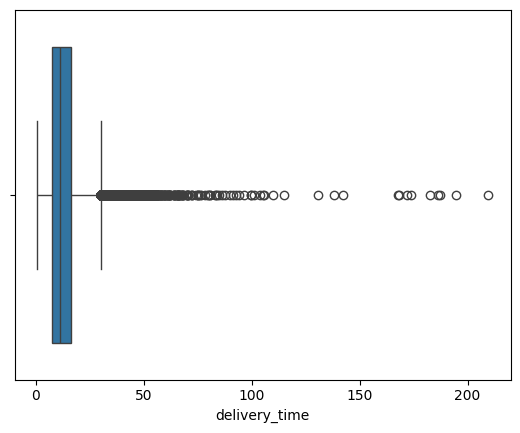

In [7]:
sns.boxplot(x=data, data=df)
plt.show()

#### Grafico de violino (ver distribuicao e outliers):

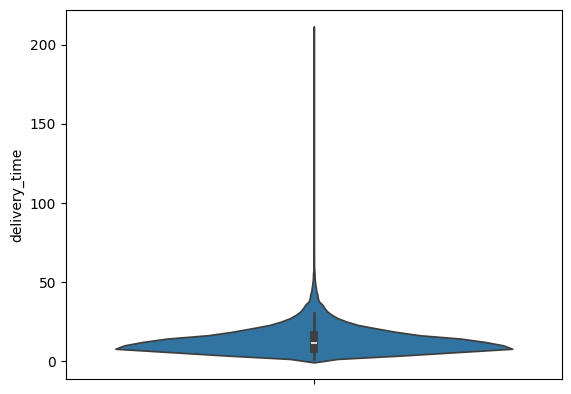

In [8]:
sns.violinplot(y= data, data=df)
plt.show()

#### Grafico de correlacao de variaveis (heatmap):

#### Correlacao de uma variavel com as outras (heatmaps):

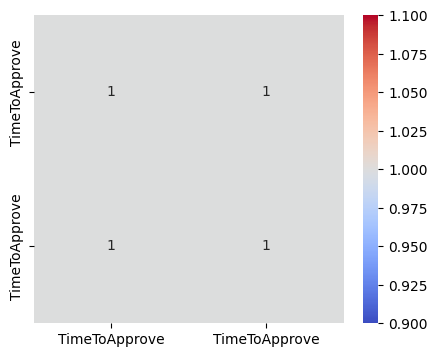

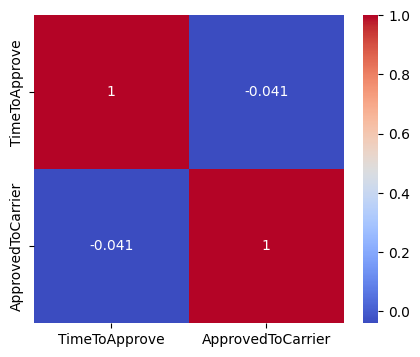

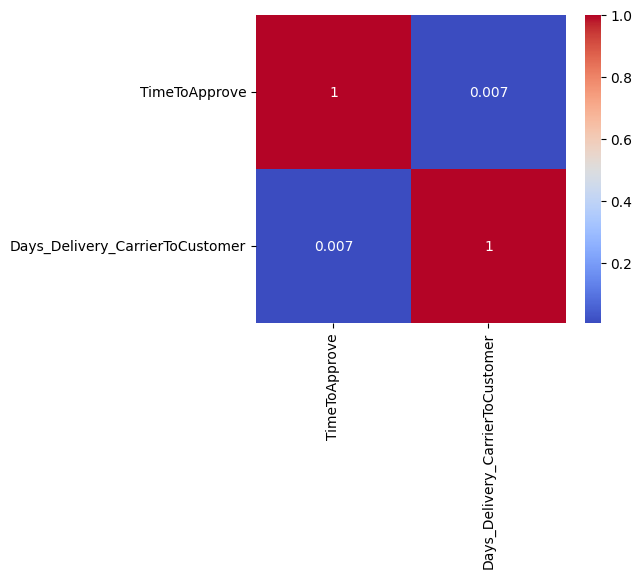

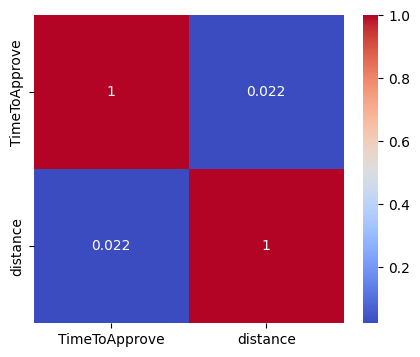

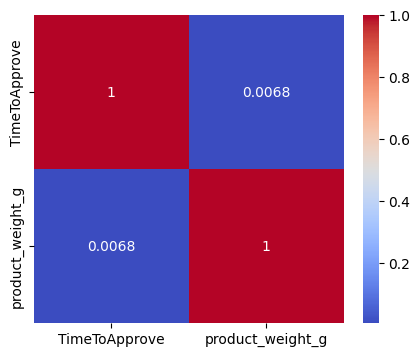

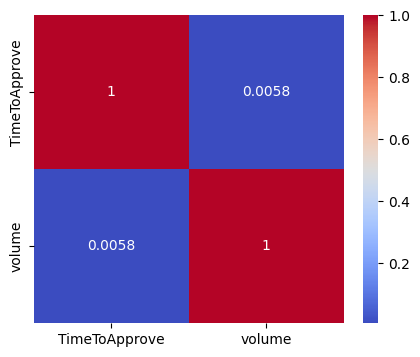

In [9]:
#adicione as variaveis a serem comparadas com a principal
variables_to_compare = ['TimeToApprove', 'ApprovedToCarrier', 'Days_Delivery_CarrierToCustomer', 'distance','product_weight_g', 'volume'] 

for variable in variables_to_compare:
    #troque delivery_time pela variavel que quer (PRINICIPAL)
    corr_matrix = df[['TimeToApprove', variable]].corr()
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

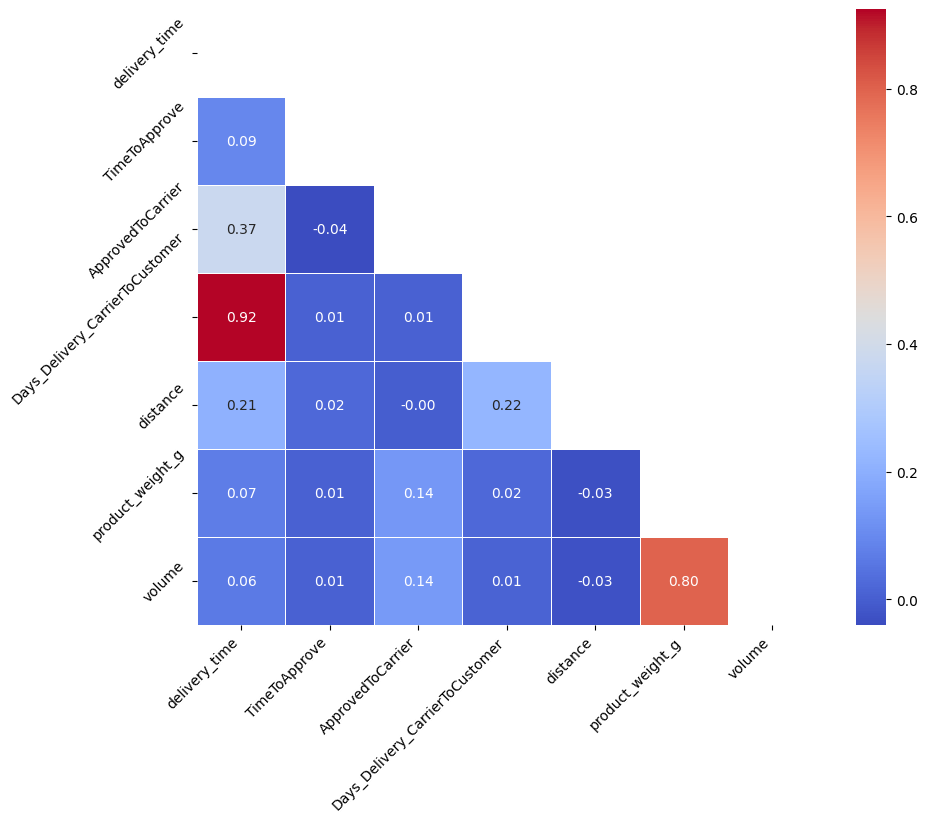

In [10]:

import numpy as np
train_data = pd.read_csv(r'C:\Users\gabri\Documents\PROJETOS\PY\PJ_Code\DE\Data\Modelo 2\dados_completos - Copy.csv')
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

train_data = remove_outliers(train_data, 'delivery_time')
train_data = remove_outliers(train_data, 'TimeToApprove')
train_data = remove_outliers(train_data, 'ApprovedToCarrier')
train_data = remove_outliers(train_data, 'Days_Delivery_CarrierToCustomer')
train_data = remove_outliers(train_data, 'distance')
train_data = train_data.drop_duplicates('order_id', keep='first')
train_data = train_data.dropna(subset=['delivery_time', 'TimeToApprove', 'ApprovedToCarrier', 'Days_Delivery_CarrierToCustomer','distance','product_category_name'])
plt.figure(figsize=(10, 8))

corr_matrix = df_num.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)

plt.show()

#### Grafico scatter (pontos):

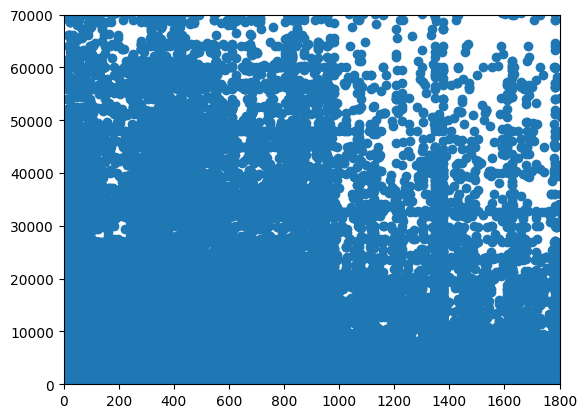

In [11]:
#coloque as duas variaveis a serem comparadas
plt.scatter(df['distance'], df['volume'])

#limites aos eixos x e y
plt.xlim(0, 1800) 
plt.ylim(0, 70000)
plt.show()

Mostrar diferenca por categoria

In [12]:

df = df.dropna(subset=['product_category_name'])

Q1 = df.groupby('product_category_name')['delivery_time'].quantile(0.25)
Q3 = df.groupby('product_category_name')['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

results = {}

for category in df['product_category_name'].dropna().unique():
    category_df = df[df['product_category_name'] == category]
    is_outlier = (category_df['delivery_time'] < lower_bound[category]) | (category_df['delivery_time'] > upper_bound[category])
    is_non_outlier = ~is_outlier
    
    outlier_count = is_outlier.sum()
    non_outlier_count = is_non_outlier.sum()
    
    non_outliers = category_df[is_non_outlier]
    non_outlier_range = (non_outliers['delivery_time'].min(), non_outliers['delivery_time'].max()) if not non_outliers.empty else (None, None)
    non_outlier_mean = non_outliers['delivery_time'].mean() if not non_outliers.empty else None
    
    results[category] = {
        'outlier_count': outlier_count,
        'non_outlier_count': non_outlier_count,
        'non_outlier_range': non_outlier_range,
        'non_outlier_mean': non_outlier_mean
    }

for category, info in results.items():
    print(f"{category}: MEDIA: {info['non_outlier_mean']}, Outliers: {info['outlier_count']}, Non-Outliers: {info['non_outlier_count']}, Non-Outlier Range: {info['non_outlier_range']}")

utilidades_domesticas: MEDIA: 10.920457307323314, Outliers: 129, Non-Outliers: 3127, Non-Outlier Range: (0.78, 27.54)
pet_shop: MEDIA: 11.45935377875137, Outliers: 40, Non-Outliers: 913, Non-Outlier Range: (1.26, 28.28)
papelaria: MEDIA: 12.593316831683168, Outliers: 50, Non-Outliers: 1414, Non-Outlier Range: (1.44, 32.68)
automotivo: MEDIA: 11.498264733395697, Outliers: 100, Non-Outliers: 2138, Non-Outlier Range: (0.99, 29.93)
moveis_escritorio: MEDIA: 18.00360576923077, Outliers: 40, Non-Outliers: 832, Non-Outlier Range: (2.12, 38.87)
informatica_acessorios: MEDIA: 12.570827602561062, Outliers: 175, Non-Outliers: 4217, Non-Outlier Range: (1.0, 30.67)
construcao_ferramentas_construcao: MEDIA: 10.650041666666668, Outliers: 15, Non-Outliers: 240, Non-Outlier Range: (1.02, 27.92)
telefonia: MEDIA: 12.412773352643013, Outliers: 101, Non-Outliers: 2762, Non-Outlier Range: (1.04, 31.02)
bebes: MEDIA: 11.713297738693468, Outliers: 86, Non-Outliers: 1592, Non-Outlier Range: (1.29, 30.3)
ferra

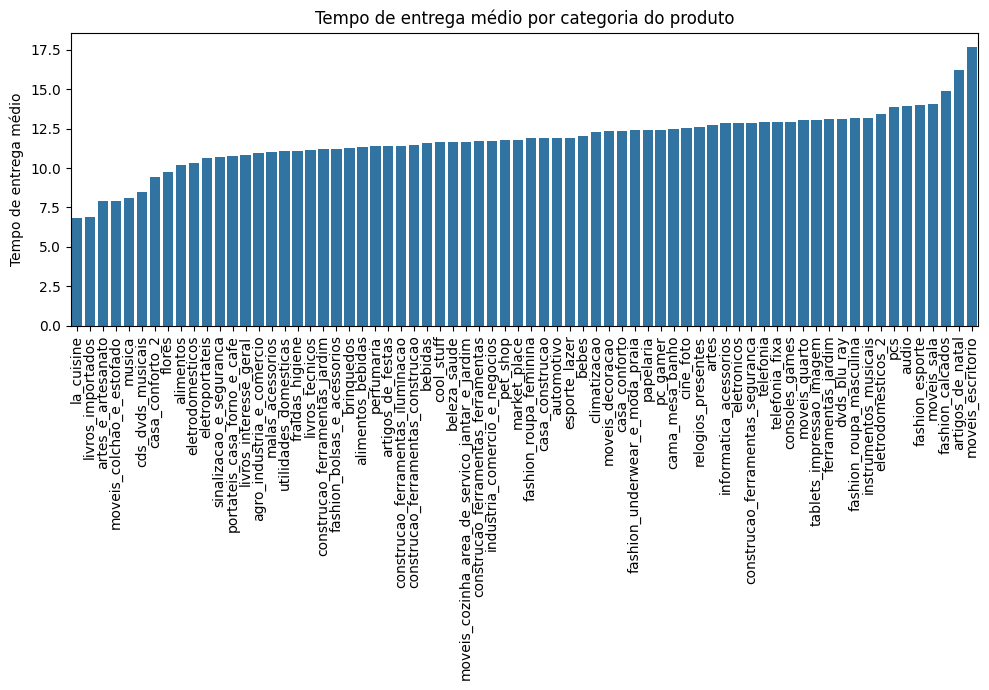

In [18]:
# Assuming df is your dataframe
df = df.dropna(subset=['product_category_name'])

# Calculate median TimeToApprove for each category
median_delivery_time = df.groupby('product_category_name')['delivery_time'].mean().sort_values()

# Plot median TimeToApproves
plt.figure(figsize=(10, 7))
sns.barplot(x=median_delivery_time.index, y=median_delivery_time.values)
plt.xticks(rotation=90)
plt.ylabel('Tempo de entrega médio')
plt.title('Tempo de entrega médio por categoria do produto')
plt.xlabel("")
plt.tight_layout()
plt.show()

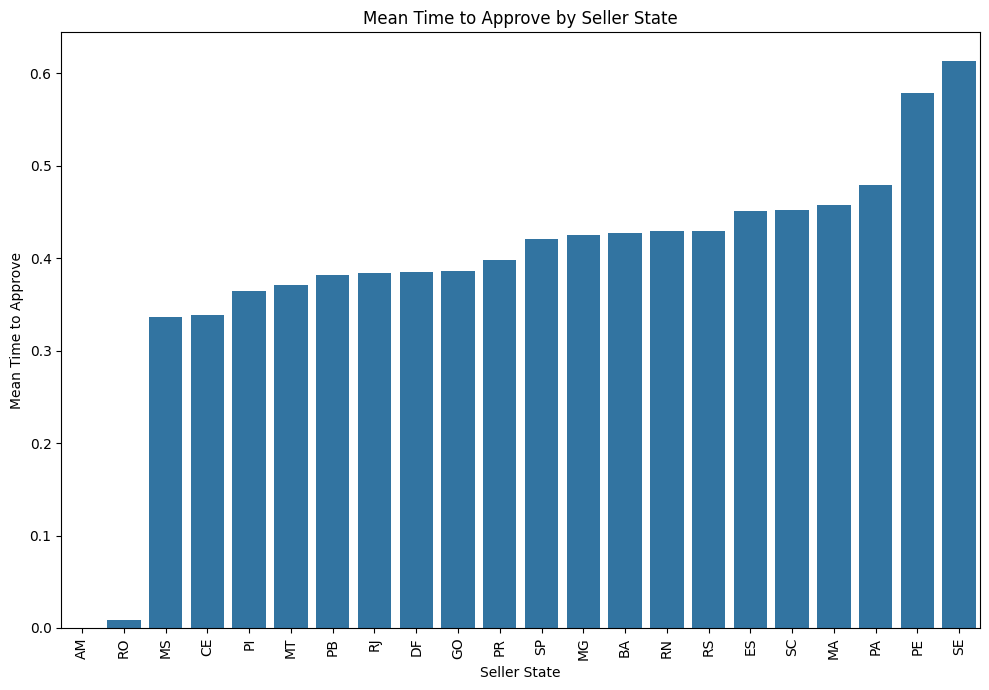

In [14]:
# Assuming df is your dataframe
df = df.dropna(subset=['seller_state'])

# Calculate median Time to Approve for each category
median_delivery_time = df.groupby('seller_state')['TimeToApprove'].mean().sort_values()

# Plot median Time to Approves
plt.figure(figsize=(10, 7))
sns.barplot(x=median_delivery_time.index, y=median_delivery_time.values)
plt.xticks(rotation=90)
plt.xlabel('Seller State')
plt.ylabel('Mean Time to Approve')
plt.title('Mean Time to Approve by Seller State')
plt.tight_layout()
plt.show()

#### Mostrar base e outliers entre uma categoria e um numero:
Ex: delivery time por estado do cliente

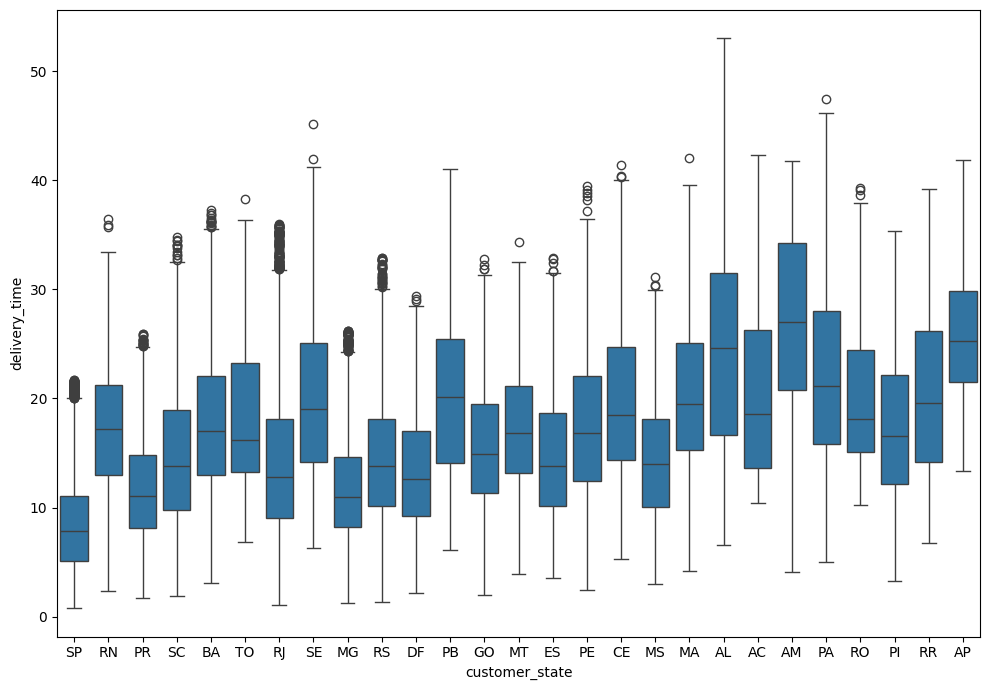

SP: Outliers: 186, Non-Outliers: 12609, Non-Outlier Range: (0.78, 20.06)


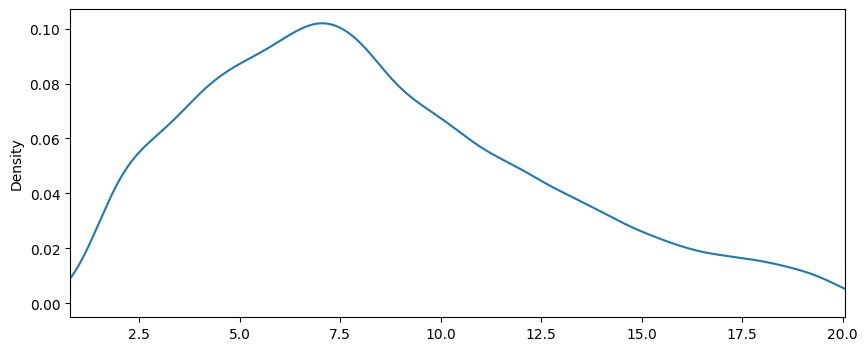

RN: Outliers: 3, Non-Outliers: 149, Non-Outlier Range: (2.4, 33.47)


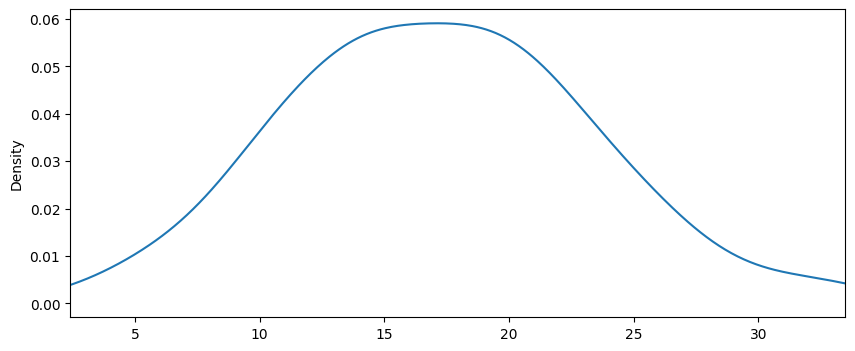

PR: Outliers: 18, Non-Outliers: 1598, Non-Outlier Range: (1.72, 24.75)


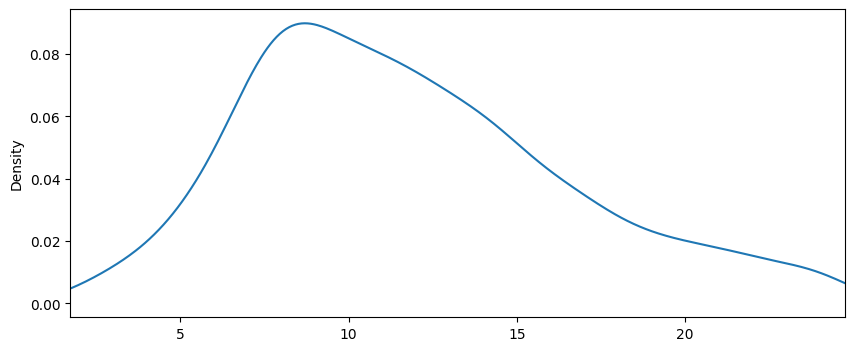

SC: Outliers: 12, Non-Outliers: 1182, Non-Outlier Range: (1.88, 32.55)


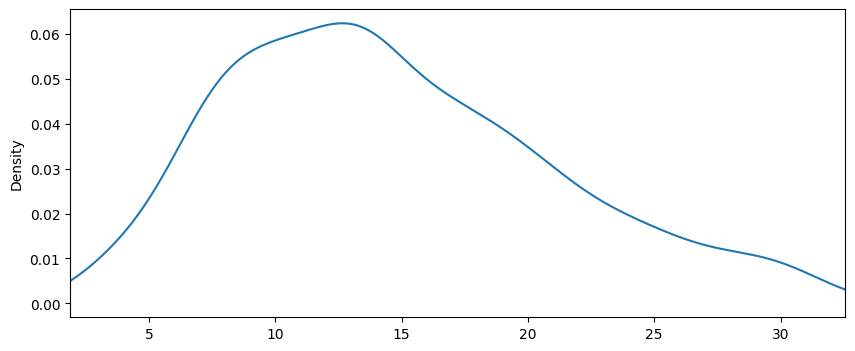

BA: Outliers: 16, Non-Outliers: 994, Non-Outlier Range: (3.11, 35.55)


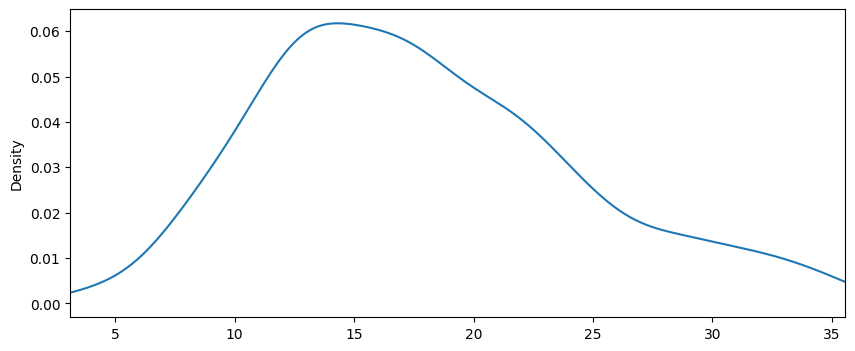

TO: Outliers: 1, Non-Outliers: 95, Non-Outlier Range: (6.89, 36.33)


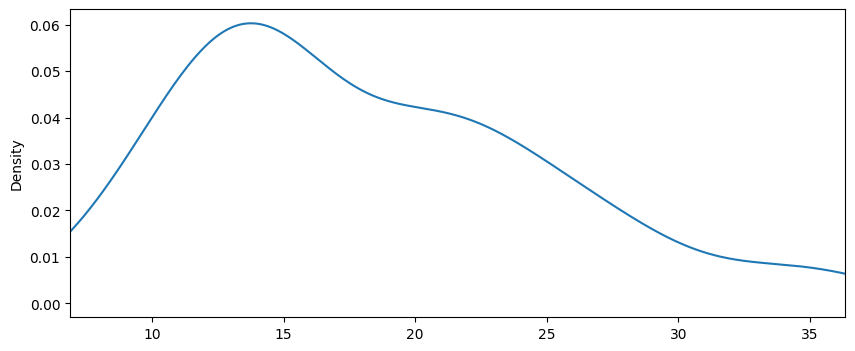

RJ: Outliers: 116, Non-Outliers: 3735, Non-Outlier Range: (1.11, 31.78)


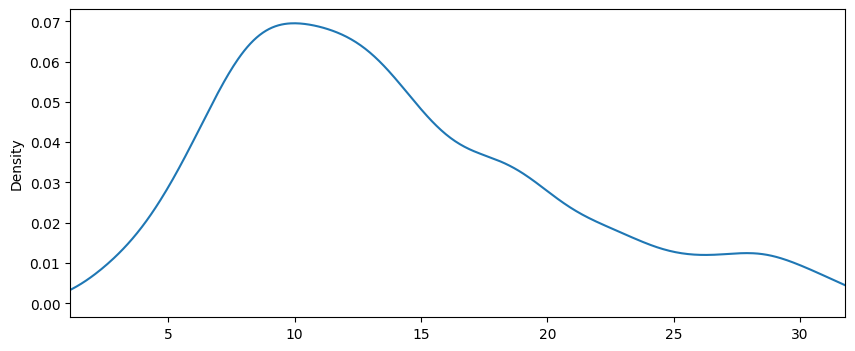

SE: Outliers: 2, Non-Outliers: 99, Non-Outlier Range: (6.34, 41.23)


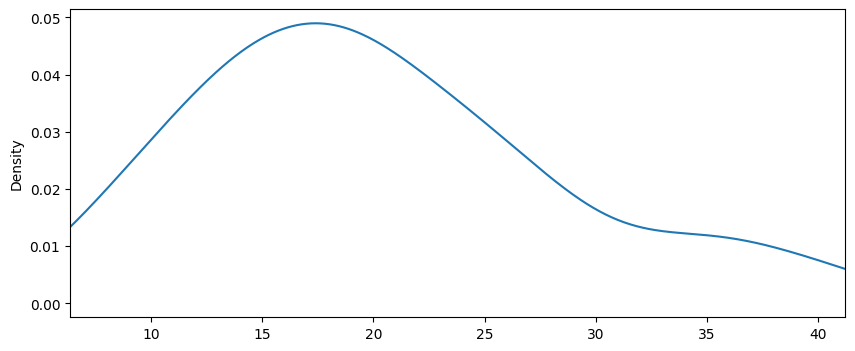

MG: Outliers: 69, Non-Outliers: 3662, Non-Outlier Range: (1.26, 24.3)


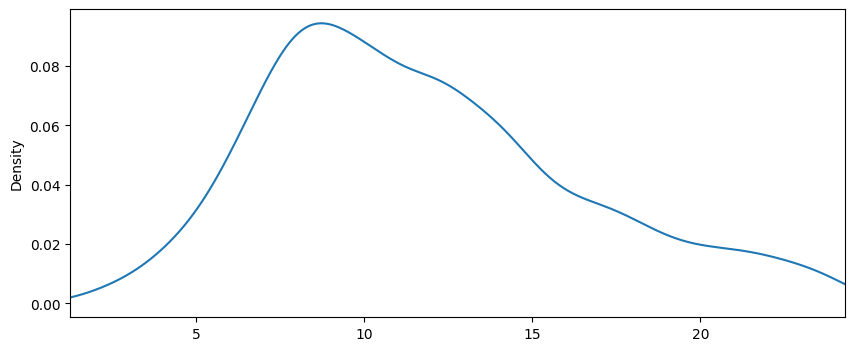

RS: Outliers: 31, Non-Outliers: 1789, Non-Outlier Range: (1.34, 30.07)


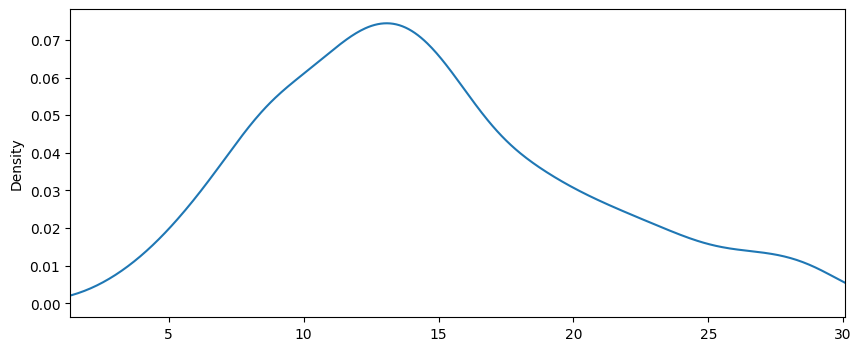

DF: Outliers: 3, Non-Outliers: 652, Non-Outlier Range: (2.21, 28.47)


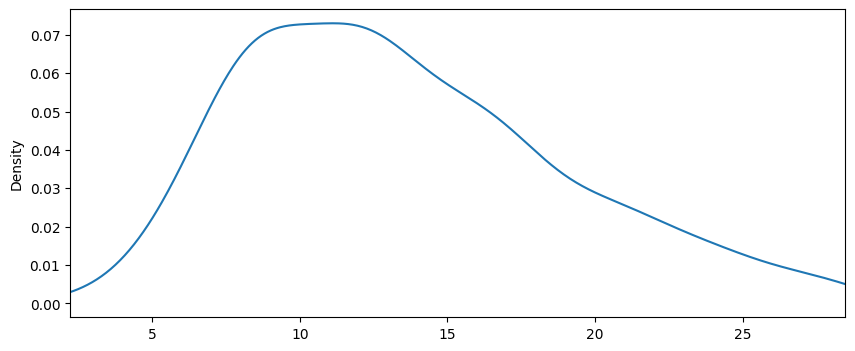

PB: Outliers: 0, Non-Outliers: 154, Non-Outlier Range: (6.08, 41.06)


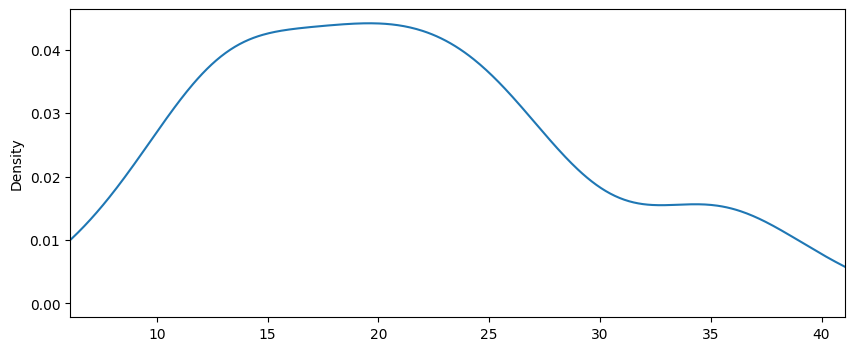

GO: Outliers: 4, Non-Outliers: 669, Non-Outlier Range: (2.01, 31.31)


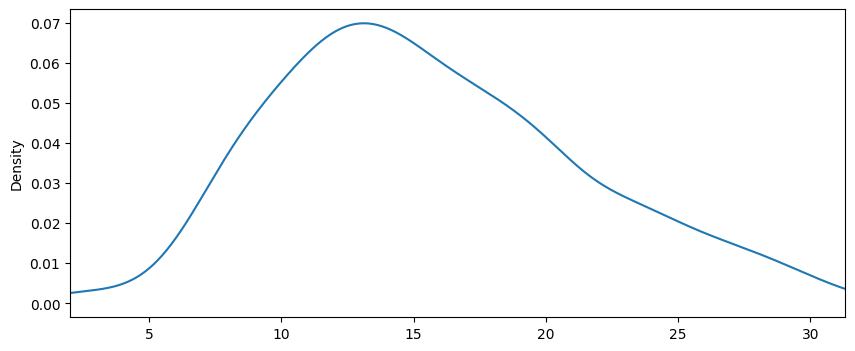

MT: Outliers: 1, Non-Outliers: 293, Non-Outlier Range: (3.92, 32.52)


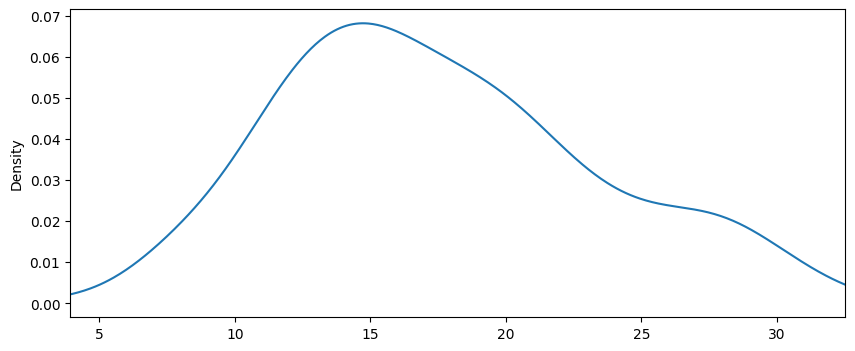

ES: Outliers: 5, Non-Outliers: 679, Non-Outlier Range: (3.56, 31.49)


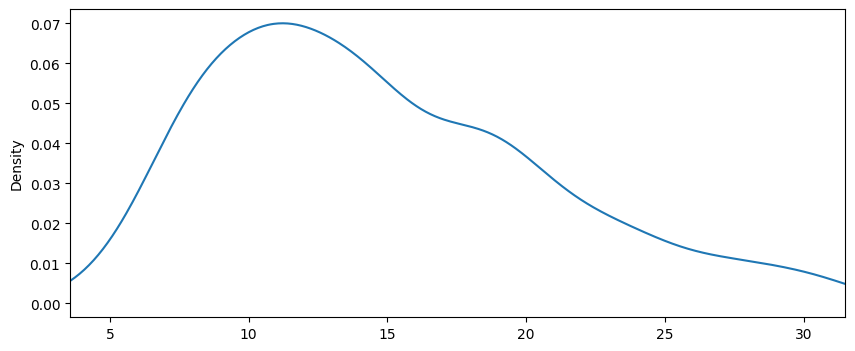

PE: Outliers: 6, Non-Outliers: 507, Non-Outlier Range: (2.47, 36.41)


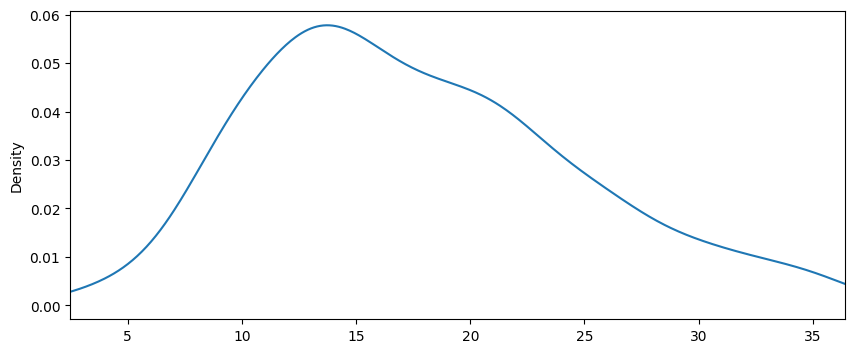

CE: Outliers: 3, Non-Outliers: 398, Non-Outlier Range: (5.33, 40.03)


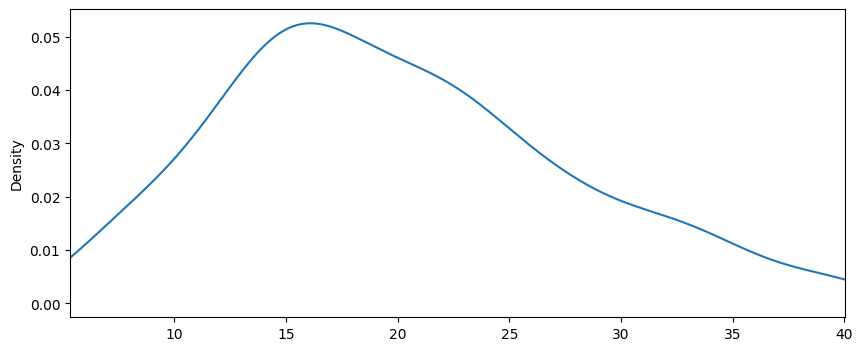

MS: Outliers: 3, Non-Outliers: 213, Non-Outlier Range: (3.04, 29.94)


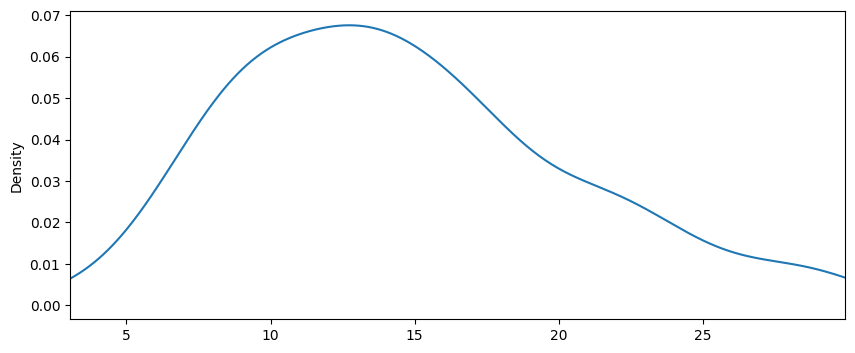

MA: Outliers: 1, Non-Outliers: 248, Non-Outlier Range: (4.17, 39.55)


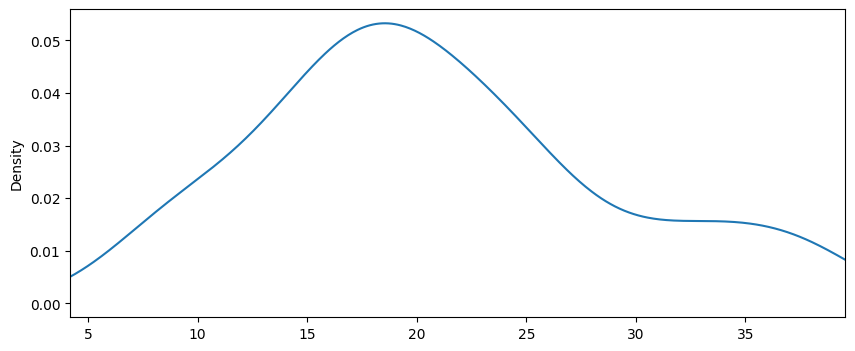

AL: Outliers: 0, Non-Outliers: 140, Non-Outlier Range: (6.57, 52.99)


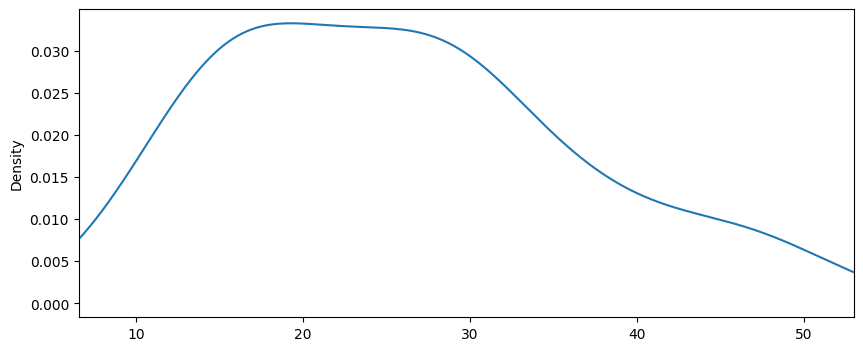

AC: Outliers: 0, Non-Outliers: 26, Non-Outlier Range: (10.46, 42.34)


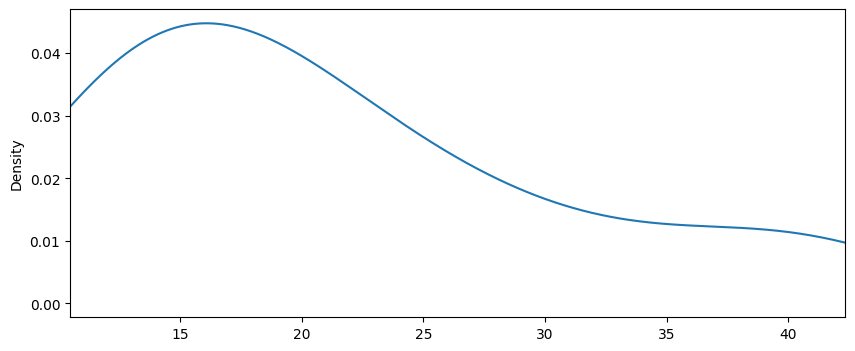

AM: Outliers: 0, Non-Outliers: 54, Non-Outlier Range: (4.12, 41.78)


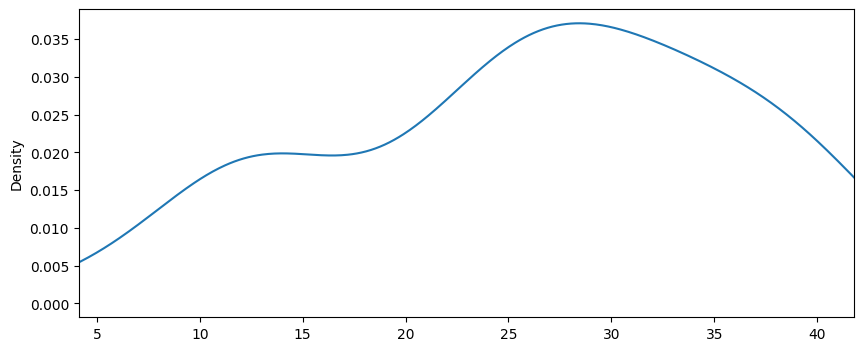

PA: Outliers: 1, Non-Outliers: 305, Non-Outlier Range: (5.02, 46.14)


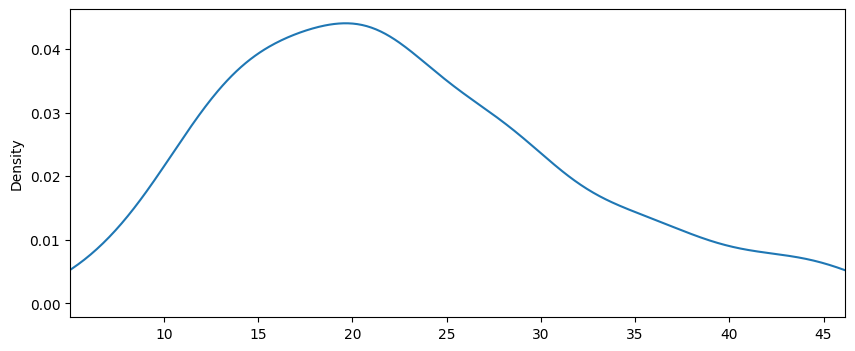

RO: Outliers: 3, Non-Outliers: 80, Non-Outlier Range: (10.26, 37.96)


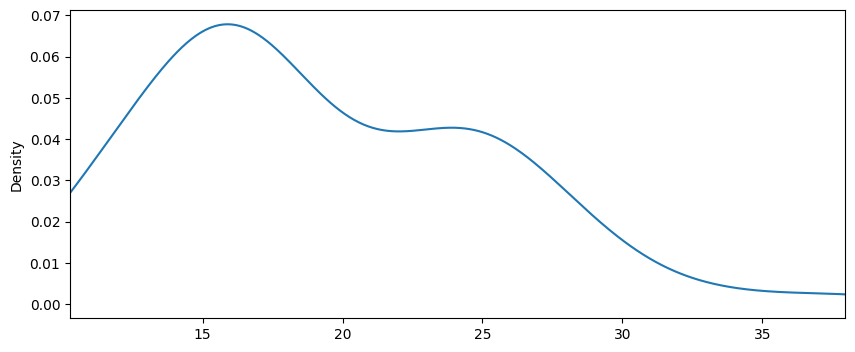

PI: Outliers: 0, Non-Outliers: 163, Non-Outlier Range: (3.27, 35.38)


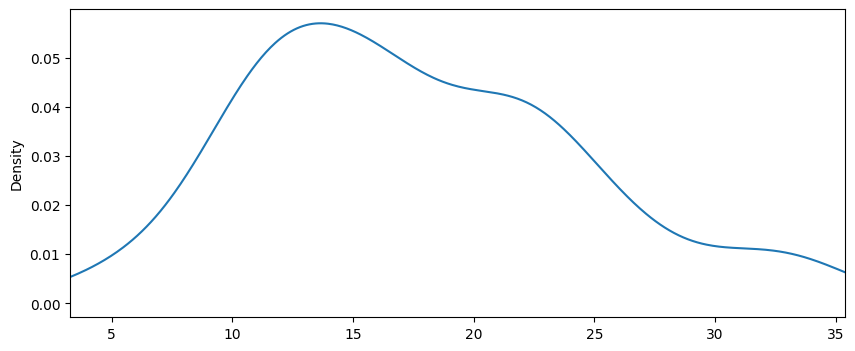

RR: Outliers: 0, Non-Outliers: 8, Non-Outlier Range: (6.74, 39.23)


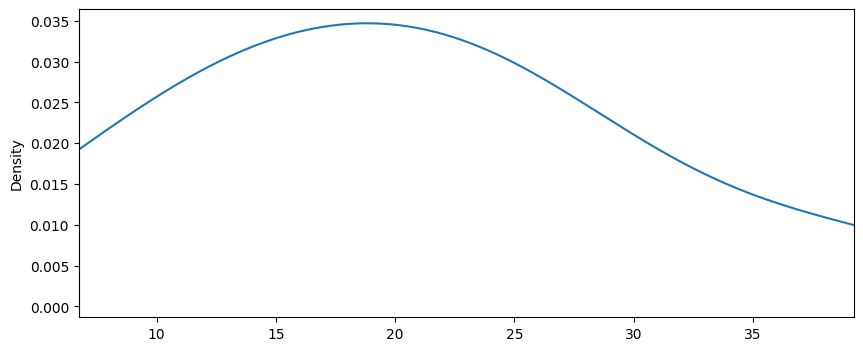

AP: Outliers: 0, Non-Outliers: 31, Non-Outlier Range: (13.37, 41.87)


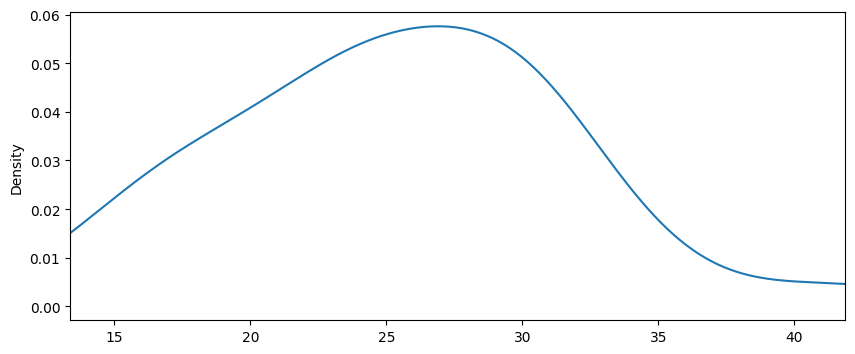

In [15]:
df = df.dropna(subset=['customer_state'])

plt.figure(figsize=(10, 7))
sns.boxplot(x='customer_state', y='delivery_time', data=df) #ajuste variaveis

plt.tight_layout()
plt.show()

Q1 = df.groupby('customer_state')['delivery_time'].quantile(0.25)
Q3 = df.groupby('customer_state')['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

results = {}

for state in df['customer_state'].dropna().unique():
    state_df = df[df['customer_state'] == state]
    is_outlier = (state_df['delivery_time'] < lower_bound[state]) | (state_df['delivery_time'] > upper_bound[state])
    is_non_outlier = ~is_outlier
    
    outlier_count = is_outlier.sum()
    non_outlier_count = is_non_outlier.sum()
    
    non_outliers = state_df[is_non_outlier]
    non_outlier_range = (non_outliers['delivery_time'].min(), non_outliers['delivery_time'].max()) if not non_outliers.empty else (None, None)
    
    results[state] = {
        'outlier_count': outlier_count,
        'non_outlier_count': non_outlier_count,
        'non_outlier_range': non_outlier_range
    }

for state, info in results.items():
    print(f"{state}: Outliers: {info['outlier_count']}, Non-Outliers: {info['non_outlier_count']}, Non-Outlier Range: {info['non_outlier_range']}")
    state_non_outliers = df[(df['customer_state'] == state) & (df['delivery_time'] >= info['non_outlier_range'][0]) & (df['delivery_time'] <= info['non_outlier_range'][1])]
    state_non_outliers['delivery_time'].plot(kind="density", figsize=(10, 4))
    plt.xlim(info['non_outlier_range'])
    plt.show()

#### Quantidade de correlacao com outras variaveis (dependencia)
>5 = alta dependencia

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
df_vim = df_num.drop(columns=['delivery_time_model', 'delivery_time', 'ModelErrorDays', 'Days_Delivery_CarrierToCustomer'])
vif_data["feature"] = df_vim.columns
vif_data["VIF"] = [variance_inflation_factor(df_vim.values, i) for i in range(len(df_vim.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

KeyError: "['delivery_time_model', 'ModelErrorDays'] not found in axis"

#### Ranking de importancia de variaveis

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe = rfe.fit(df_num, df['delivery_time'])

feature_ranking = zip(df_num.columns, rfe.ranking_)

sorted_feature_ranking = sorted(feature_ranking, key=lambda x: x[1])

print("Feature Ranking:")
for feature, rank in sorted_feature_ranking:
    print(f"{feature}: {rank}")

Feature Ranking:
delivery_time: 1
ModelErrorDays: 2
delivery_time_model: 3
Days_Delivery_CarrierToCustomer: 4
distance: 5
product_weight_g: 6
volume: 7


#### Modelagem baseada em eliminacao recursiva de features:
Modelando delivery time baseado em somente x variavel, teremos:
  
MSE: Quadrado do valor do erro medio  
R2: Quao relacionada esta a variacao de delivery time com a variacao dessa variavel   
(vai de 0 a 1, com 1 melhor)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

y = df_num['delivery_time']

X_weight = df_num[['product_weight_g']]
X_train_weight, X_test_weight, y_train_weight, y_test_weight = train_test_split(X_weight, y, test_size=0.2, random_state=42)

model_weight = LinearRegression()
model_weight.fit(X_train_weight, y_train_weight)
predictions_weight = model_weight.predict(X_test_weight)

mse_weight = mean_squared_error(y_test_weight, predictions_weight)
r2_weight = r2_score(y_test_weight, predictions_weight)


X_volume = df_num[['volume']]
X_train_volume, X_test_volume, y_train_volume, y_test_volume = train_test_split(X_volume, y, test_size=0.2, random_state=42)

model_volume = LinearRegression()
model_volume.fit(X_train_volume, y_train_volume)
predictions_volume = model_volume.predict(X_test_volume)

mse_volume = mean_squared_error(y_test_volume, predictions_volume)
r2_volume = r2_score(y_test_volume, predictions_volume)

print("Performance with product_weight_g only:")
print(f"MSE: {mse_weight}")
print(f"R2: {r2_weight}\n")

print("Performance with volume only:")
print(f"MSE: {mse_volume}")
print(f"R2: {r2_volume}\n")


Performance with product_weight_g only:
MSE: 46.39052471891065
R2: 0.0017553704017210237

Performance with volume only:
MSE: 46.355989682348266
R2: 0.0024985052334624003



#### Grafico de importancia relativa (soma 1)

Como ambas tem baixa correlacao com target, considera-se apaga-las

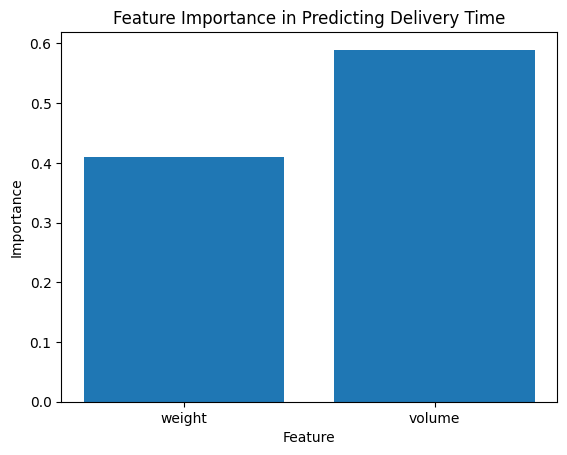

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the dataset
# Replace 'weight', 'volume', and 'delivery_time' with the actual column names in your dataset
X = df[['product_weight_g', 'volume']]  # Features
y = df['delivery_time']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Getting the feature importances
importances = model.feature_importances_

# Visualizing the feature importances
features = ['weight', 'volume']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting Delivery Time')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10,
                          random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
          vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.show()

#### TESTAR MODELO E SEUS ERROS

In [ ]:
from sklearn.metrics import mean_squared_error

# Fit model with both variables
model.fit(X[['product_weight_g', 'volume']], y)
pred_both = model.predict(X_test[['product_weight_g', 'volume']])
mse_both = mean_squared_error(y_test, pred_both)

# Fit model without 'weight'
model.fit(X[['volume']], y)
pred_volume_only = model.predict(X_test[['volume']])
mse_volume_only = mean_squared_error(y_test, pred_volume_only)

# Fit model without 'volume'
model.fit(X[['product_weight_g']], y)
pred_weight_only = model.predict(X_test[['product_weight_g']])
mse_weight_only = mean_squared_error(y_test, pred_weight_only)

print(f"MSE with both: {mse_both}")
print(f"MSE with volume only: {mse_volume_only}")
print(f"MSE with weight only: {mse_weight_only}")

MSE with both: 30.594266014861073
MSE with volume only: 40.52485713477163
MSE with weight only: 43.62468162669875


#### Treinamento e teste de modelo (com julgamento de variaveis):

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X = df_num.drop(['delivery_time'], axis=1) 
y = df_num['delivery_time'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.5)  
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

coef = lasso.coef_
print("Lasso picked " + str(np.sum(coef != 0)) + " variables and eliminated the other " +
      str(np.sum(coef == 0)) + " variables")

for feature, coeff in zip(X.columns, coef):
    print(f"{feature}: {coeff}")

Mean Squared Error: 0.41364956282479515
Lasso picked 6 variables and eliminated the other 0 variables
TimeToApprove: 0.291618882090797
ApprovedToCarrier: 0.9399225010324016
Days_Delivery_CarrierToCustomer: 0.991690424330862
distance: 4.0190039849198736e-05
product_weight_g: 4.7046541271993045e-06
volume: 7.051677856817856e-07
